In [81]:
%pip install pandas matplotlib

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
# Read the data from the CSV file
data = pd.read_csv('gbpusd.csv')

# Convert the 'Date' column to a datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Sort the data by date in ascending order
data.sort_values('Date', inplace=True)

In [84]:
print(data)

           Date   Price
0    2013-01-01  1.6244
1    2013-01-02  1.6256
2    2013-01-03  1.6107
3    2013-01-04  1.6071
4    2013-01-07  1.6114
...         ...     ...
2739 2023-07-03  1.2691
2740 2023-07-04  1.2712
2741 2023-07-05  1.2704
2742 2023-07-06  1.2740
2743 2023-07-07  1.2825

[2744 rows x 2 columns]


In [85]:
# Compute the 50-day and 200-day moving averages
data['50DMA'] = data['Price'].rolling(window=50).mean()
data['200DMA'] = data['Price'].rolling(window=200).mean()

In [86]:
print(data['50DMA'])
print(data['200DMA'])

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2739    1.255154
2740    1.255762
2741    1.256236
2742    1.256742
2743    1.257248
Name: 50DMA, Length: 2744, dtype: float64
0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2739    1.212050
2740    1.213041
2741    1.213949
2742    1.214762
2743    1.215594
Name: 200DMA, Length: 2744, dtype: float64


In [94]:
# Initialize cumul_profits with 0
data['cumul_profits'] = 0

position = 0

# Implement the trading strategy
for i in range(1, len(data)):
    if data['50DMA'].loc[i] > data['200DMA'].loc[i] and data['50DMA'].loc[i - 1] < data['200DMA'].loc[i - 1]:
        # Crossing from below: long GBPUSD, subtract spot price from cumul_profits
        data.loc[i, 'cumul_profits'] = data.loc[i - 1, 'cumul_profits'] - data.loc[i, 'Price']
        position -= 1
    elif data['50DMA'].loc[i] < data['200DMA'].loc[i] and data['50DMA'].loc[i - 1] > data['200DMA'].loc[i - 1]:
        # Crossing from above: short GBPUSD, add spot price to cumul_profits
        data.loc[i, 'cumul_profits'] = data.loc[i - 1, 'cumul_profits'] + data.loc[i, 'Price']
        position += 1
    else:
        # No crossover: maintain previous cumul_profits value
        data.loc[i, 'cumul_profits'] = data.loc[i - 1, 'cumul_profits']
        position = position

# Final position adjustment
final_spot_price = data['Price'].iloc[-1]  # Get the final spot price
if position == -1:
    # Last operation was a long: add final spot price to cumul_profits
    data.loc[data.index[-1], 'cumul_profits'] += final_spot_price
elif position == 1:
    # Last operation was a short: subtract final spot price from cumul_profits
    data.loc[data.index[-1], 'cumul_profits'] -= final_spot_price


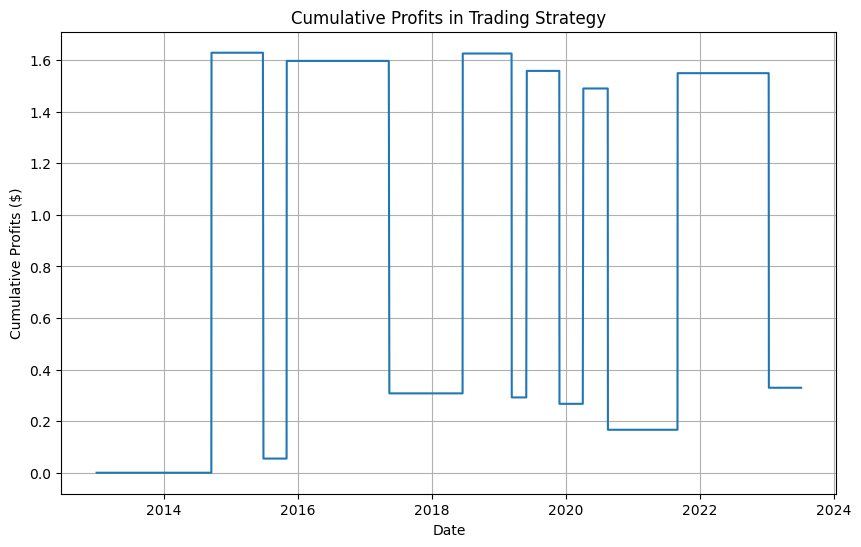

In [95]:
# Plotting the cumulative profits
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['cumul_profits'])
plt.xlabel('Date')
plt.ylabel('Cumulative Profits ($)')
plt.title('Cumulative Profits in Trading Strategy')
plt.grid(True)
plt.show()